In [1]:
# ADD LOCAL SYSTEM PATH FOR RELATIVE IMPORTS
import sys
sys.path.append("../../../../../")

In [2]:
# THIRD PART IMPORTS
import pandas
import numpy
#import matplotlib.pyplot as pyplot

In [10]:
# CUSTOM IMPORTS
from generative_standards.stores import files as GSfiles
from generative_standards.geometry import voronoi as GSvoronoi
from generative_standards.geometry import points as GSpoints
from scipy.spatial import Voronoi

points module imported.


- 7_1_2_5_7_8_8_7_2_2_0_9_points


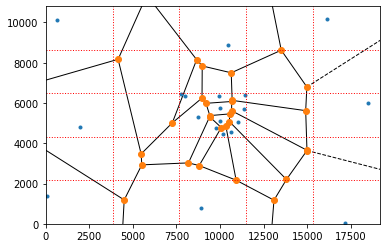

- 3_11_8_9_3_0_5_8_5_5_0_1_points


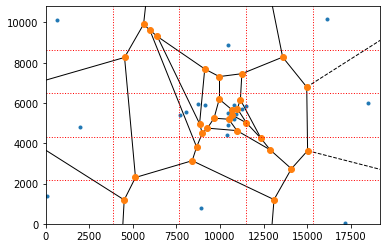

- nanpoints
- 7_11_2_6_7_11_10_0_5_11_8_3_points


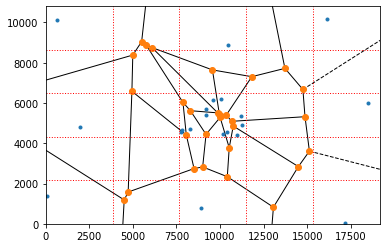

- 1_1_8_6_1_3_2_4_5_7_9_3_points


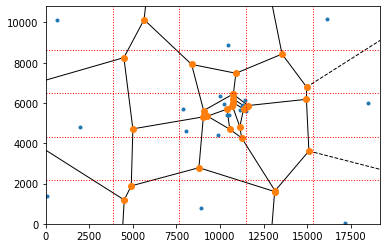

- 1_6_5_3_10_5_7_11_9_10_3_11_points


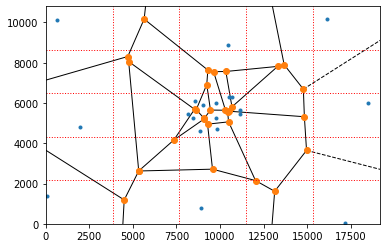

- 5_8_7_4_9_10_9_7_7_0_9_2_points


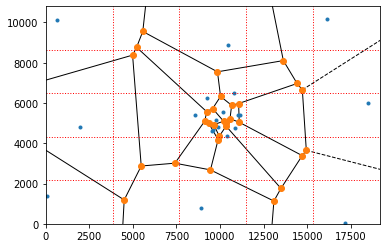

- 1_1_1_5_5_6_2_5_10_10_6_9_points


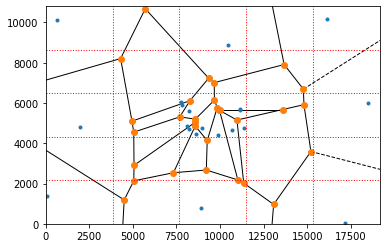

- nanpoints
- nanpoints
- 7_10_2_10_9_6_7_4_7_3_3_8_points


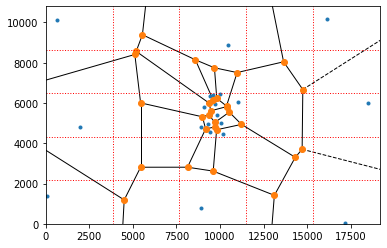

- 1_4_5_10_10_1_1_6_5_2_5_2_points


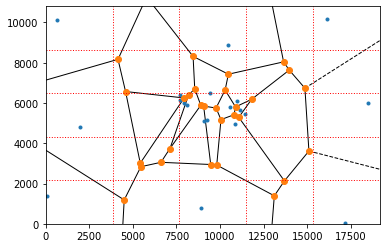

- 4_9_5_9_1_10_9_1_8_5_0_3_points


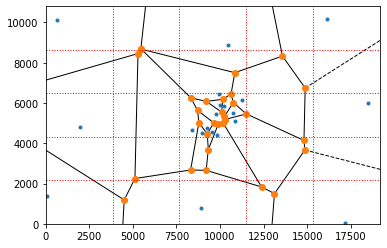

- 7_6_8_5_11_8_4_4_0_7_0_5_points


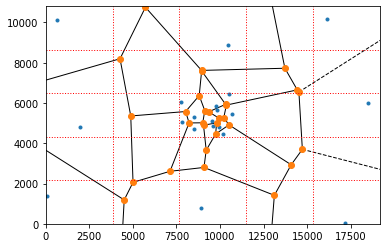

- 7_8_10_7_9_10_7_6_1_4_9_5_points


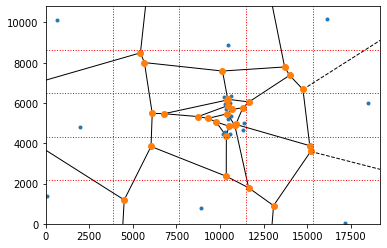

- 10_0_1_9_3_7_5_4_6_2_2_4_points


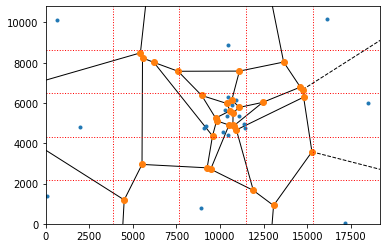

- 5_5_5_5_5_5_5_5_5_5_5_5_points


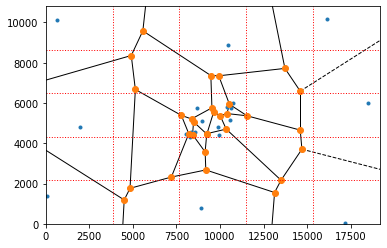

- 9_1_0_5_0_3_8_8_3_10_5_8_points


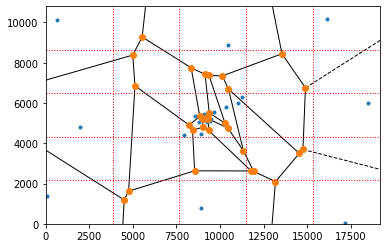

- 1_11_10_8_8_3_11_0_0_9_1_3_points


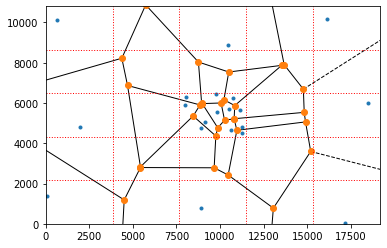

- 5_6_11_7_6_3_9_4_10_6_0_8_points


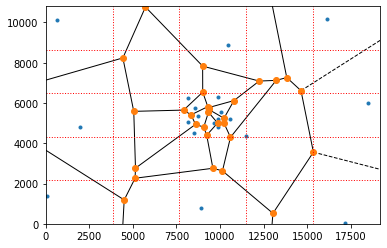

- 7_5_3_5_5_3_10_8_10_1_4_6_points


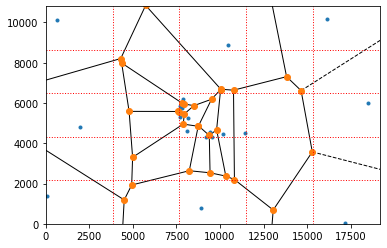

- 5_7_8_2_3_3_8_11_4_5_7_11_points


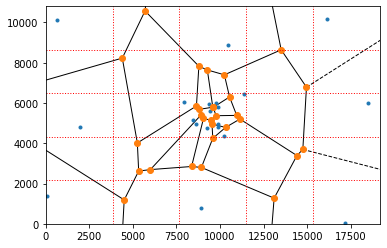

- 5_5_10_9_5_3_1_5_1_7_7_10_points


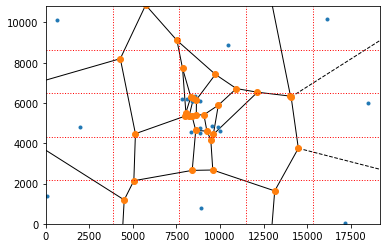

- 9_11_10_4_4_8_6_7_6_5_10_2_points


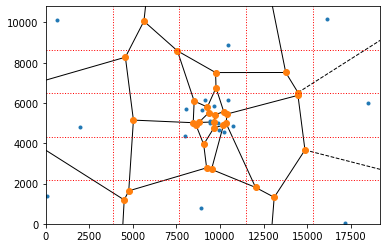

- 2_5_0_5_5_1_5_10_7_0_3_11_points


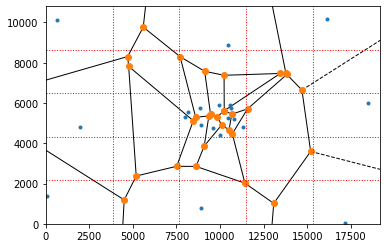

- 5_8_2_2_10_10_11_1_6_5_3_3_points


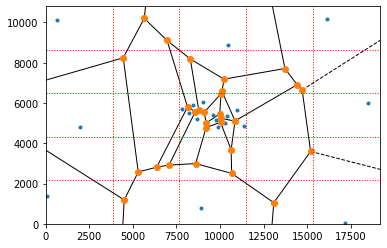

- 0_0_4_6_11_9_11_4_10_8_8_0_points


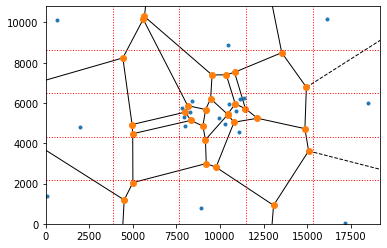

- 5_8_10_0_4_7_2_10_2_0_7_3_points


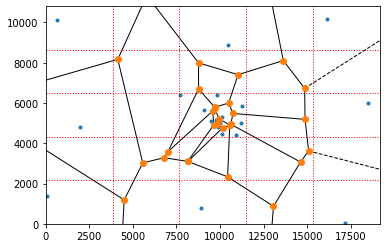

- 7_1_9_7_2_2_11_8_1_8_0_1_points


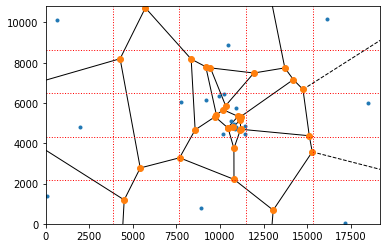

- 5_2_6_9_2_5_3_8_10_7_1_4_points


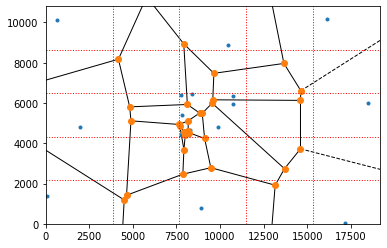

- 7_0_9_4_4_9_5_8_5_1_5_2_points


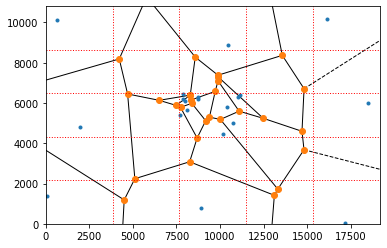

- 7_8_10_2_2_4_3_1_1_9_8_6_points


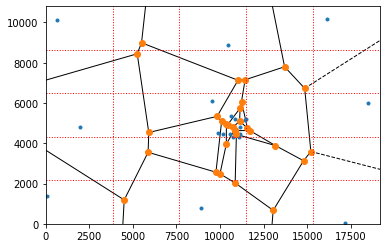

- 6_0_11_0_11_2_10_6_5_11_5_3_points


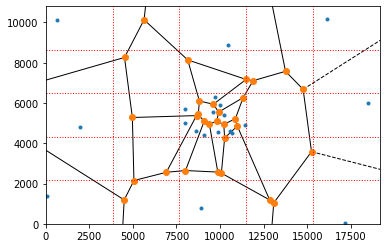

- 5_8_7_8_9_2_8_2_1_4_4_0_points


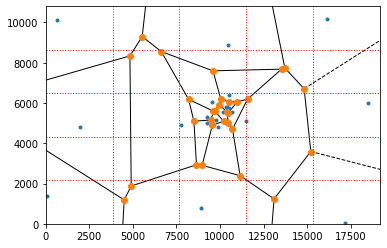

- 7_8_2_8_3_4_7_10_3_8_8_7_points


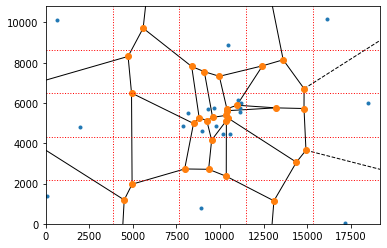

In [14]:
the_tokens_file = "D:\\Dropbox (Personal)\\XXXX_PERS_Git\\neuramod_data\\data\\processed\\stim\\experiment_1\\lastSelectedTokens.xlsx"
the_dataset_file = "D:\\Dropbox (Personal)\\XXXX_PERS_Git\\neuramod_data\\data\\raw\\stim\\experiment_1\\dataset.h5"

df = pandas.ExcelFile(the_tokens_file).parse('Tabelle1') #you could add index_col=0 if there's an index
the_tokens=[tok for tok in df['Last Selection']]
the_dataset = GSfiles.HDFUtils(the_dataset_file)


# token image size in px
im_size = (3840,2160)
#create 8 furthest points to voronoi diagram
fPoints = GSpoints.PointsCreator()
furthest_points = fPoints.randomUniformPoints2D(im_size[0],im_size[1],8,0)

# placing points at each thirds (counter-clockwise)
furthest_points[0] += numpy.array([1,1]) # bottom left corner
furthest_points[1] += numpy.array([1,im_size[1]*2]) # middle left corner
furthest_points[2] += numpy.array([1,im_size[1]*4]) # top left corner
furthest_points[3] += numpy.array([im_size[0]*2,im_size[1]*4]) # middle top corner
furthest_points[4] += numpy.array([im_size[0]*4,im_size[1]*4]) # top right corner
furthest_points[5] += numpy.array([im_size[0]*4,im_size[1]*2]) # middle right corner
furthest_points[6] += numpy.array([im_size[0]*4,1]) # bottom right corner
furthest_points[7] += numpy.array([im_size[0]*2,1]) # middle bottom corner

vDiag = GSvoronoi.VoronoiCreator()
vViz = GSvoronoi.Viz()

for tok in the_tokens:
    the_name = f"{tok}points"
    the_data = the_dataset.getDatasetFromHDF(the_name, the_dataset.data_file)
    #print(f"- {the_name}: {the_data}")
    print(f"- {the_name}")
    if the_data is not None:
        #the_regions = vDiag.voronoiDiagram(the_data,furthest_points,numpy.empty([2,2],dtype=int),1)
        dim = the_data.shape[-1]
        voronoi = Voronoi(numpy.vstack((furthest_points,the_data)))
        the_region = voronoi.regions[list(voronoi.point_region)[-1]]
        the_vertices = numpy.asarray(voronoi.vertices)
        if len(the_region)>3:
            the_region_verts = numpy.asarray(the_vertices[the_region])
        else:
            the_region_verts = numpy.empty(shape=(0,dim),dtype='float64')


        vViz.vizCells2D(voronoi,(3840,2160))
    

In [26]:
read = the_dataset.readDataKeysFromHDF(the_dataset_file, the_keys = None)

In [27]:
print(read)

[{'0_0_0_image': <Closed HDF5 dataset>}, {'0_0_0_points': <Closed HDF5 dataset>}, {'0_0_10_image': <Closed HDF5 dataset>}, {'0_0_10_points': <Closed HDF5 dataset>}, {'0_0_11_image': <Closed HDF5 dataset>}, {'0_0_11_points': <Closed HDF5 dataset>}, {'0_0_1_image': <Closed HDF5 dataset>}, {'0_0_1_points': <Closed HDF5 dataset>}, {'0_0_2_image': <Closed HDF5 dataset>}, {'0_0_2_points': <Closed HDF5 dataset>}, {'0_0_3_image': <Closed HDF5 dataset>}, {'0_0_3_points': <Closed HDF5 dataset>}, {'0_0_4_0_image': <Closed HDF5 dataset>}, {'0_0_4_0_points': <Closed HDF5 dataset>}, {'0_0_4_10_image': <Closed HDF5 dataset>}, {'0_0_4_10_points': <Closed HDF5 dataset>}, {'0_0_4_11_image': <Closed HDF5 dataset>}, {'0_0_4_11_points': <Closed HDF5 dataset>}, {'0_0_4_1_image': <Closed HDF5 dataset>}, {'0_0_4_1_points': <Closed HDF5 dataset>}, {'0_0_4_2_image': <Closed HDF5 dataset>}, {'0_0_4_2_points': <Closed HDF5 dataset>}, {'0_0_4_3_image': <Closed HDF5 dataset>}, {'0_0_4_3_points': <Closed HDF5 datase